<a href="https://colab.research.google.com/github/Sowmyad15/SMS_Spam/blob/main/Supervised_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from transformers import BertTokenizer, BertModel
from sklearn.metrics import silhouette_score


In [ ]:
df=pd.read_csv('/content/spam.csv',encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df = df.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
df.columns = ["label", "message"]
df['label_num']=df['label'].map({
    'ham':0,
    'spam':1
})
df.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)
df['preprocessed_txt'] = df['message'].apply(preprocess)
df.head()

,label,message,label_num,preprocessed_txt
0,ham,"Go until jurong point, crazy.. Available only ...",0,jurong point crazy available bugis n great wor...
1,ham,Ok lar... Joking wif u oni...,0,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,0,u dun early hor u c
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah think go usf live


In [ ]:
from sklearn.model_selection import train_test_split



In [ ]:
import torch
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased').to(device)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
def get_bert_embedding(text):
    tokens = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    with torch.no_grad():
        output = model(**tokens.to(device))
    embeddings = output.last_hidden_state.mean(dim=1).cpu().numpy()
    return embeddings


In [ ]:
df['bert_embedding'] = df['preprocessed_txt'].apply(get_bert_embedding)


In [ ]:
X = np.vstack(df['bert_embedding'].to_numpy())

In [ ]:
X

array([[-5.23086973e-02, -5.26819408e-01,  6.00303173e-01, ...,
        -1.68078281e-02,  7.96578377e-02,  6.67725503e-03],
       [ 1.34806037e-02, -6.25014454e-02,  4.68337506e-01, ...,
        -1.98317170e-01, -3.54611754e-01,  2.51734793e-01],
       [ 6.96029514e-02, -2.23868527e-02,  6.79387331e-01, ...,
        -5.75951114e-02, -6.46834001e-02,  2.88564831e-01],
       ...,
       [ 6.38745204e-02,  7.54342088e-03, -4.30002473e-02, ...,
         3.28168385e-02, -3.16936523e-01, -7.62076154e-02],
       [ 4.56439584e-01, -2.78951943e-01,  3.98768902e-01, ...,
        -2.32835174e-01, -2.25325763e-01, -1.31051004e-01],
       [-3.73822462e-04, -2.98148245e-01, -2.55075693e-01, ...,
         1.37871608e-01,  1.05675243e-01, -1.22211814e-01]], dtype=float32)

In [ ]:
len(X)

5572

In [ ]:
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(X)

In [ ]:
reduced_embeddings

array([[-2.0109322 , -0.07565765],
       [-1.561736  ,  2.9088562 ],
       [-2.5629964 , -2.9366388 ],
       ...,
       [ 3.3601727 , -0.5036384 ],
       [-1.082446  ,  0.4289278 ],
       [ 3.9977112 , -1.1236134 ]], dtype=float32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    reduced_embeddings,
    df.label_num,
    test_size=0.2,
    random_state=42
)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report


lr=LogisticRegression(class_weight='balanced')
lr.fit(X_train,y_train)

pred=lr.predict(X_test)

accuracy=accuracy_score(y_test,pred)
report=classification_report(y_test,pred)

print(f'Accuracy: {accuracy}\nClassification Report:\n{report}')

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

conf_matrix = confusion_matrix(y_test, pred)

print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.9551569506726457
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       965
           1       0.76      0.97      0.85       150

    accuracy                           0.96      1115
   macro avg       0.88      0.96      0.91      1115
weighted avg       0.96      0.96      0.96      1115

Confusion Matrix:
[[920  45]
 [  5 145]]


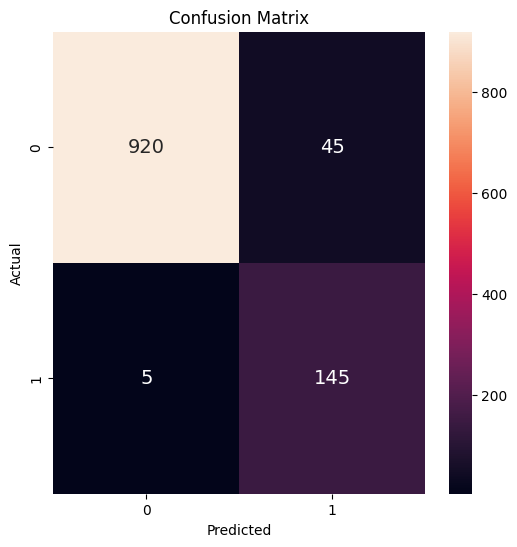

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cbar=True, annot_kws={"size": 14})
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()